Intro
* Today's demo about itk, itk-elastix, MONAI by **Konstantinos Ntatsis** & **Niels Dekker**
* Elastix code in C++ --> wrapping in python (collaborating with **Matt McCormick**, **Tom Birdsong**, **Dženan Zukić**)
* First elastix wrapping was SimpleElastix by **Kasper Marstal** (now it is part of SimpleITK)
* This is interactive (interuptive) demo


# itk (python module)
![alternatvie text](https://itk.org/wp-content/uploads/2019/10/ITK_Logo_Large-300x143.png)

In [1]:
import itk  # also elastix lives here (simply: pip install itk-elastix)

In [2]:
# Load the fixed and moving image
fixed_image = itk.imread("./data/CT_2D_head_fixed.mha", itk.F)
moving_image = itk.imread("./data/CT_2D_head_moving.mha", itk.F)

In [3]:
# itk <--> numpy
import numpy as np

fixed_image_array = np.asarray(fixed_image) # equivalent: itk.array_from_image(fixed_image)
tmp_fixed_image = itk.image_from_array(fixed_image_array) # the reverse ... metadata lost though

In [4]:
print("Object type:     ", type(fixed_image))
print("Shape (numpy):   ", fixed_image.shape)
print("Size (itk):      ", fixed_image.GetLargestPossibleRegion().GetSize())

Object type:      <class 'itk.itkImagePython.itkImageF2'>
Shape (numpy):    (256, 256)
Size (itk):       itkSize2 ([256, 256])


In [5]:
print(fixed_image)

Image (000001B721DD5370)
  RTTI typeinfo:   class itk::Image<float,2>
  Reference Count: 1
  Modified Time: 427
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 238
  UpdateMTime: 426
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [256, 256]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [256, 256]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [256, 256]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (000001B727D362F0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,float>
      Reference Count: 1
      Modified Time: 423
      Debug: Off
      Object Name: 
      Observers: 
        none
      

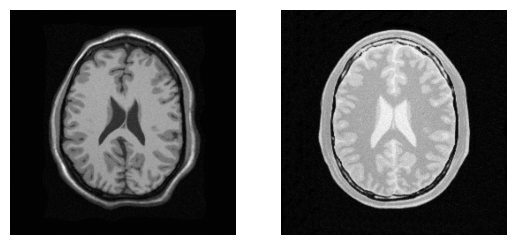

In [6]:
import matplotlib.pyplot as plt

def show_images(image1, image2):
    plt.subplot(1, 2, 1)
    plt.imshow(image1, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(image2, cmap='gray')
    plt.axis('off')
    plt.show()

# Show using matplotlib
# Note: Physical properties not taken into account!
show_images(fixed_image, moving_image)

In [7]:
# moving_image.max() # this doesn't work
moving_image[:].max()

NDArrayITKBase(251., dtype=float32)

# itk-elastix

### The parameter object

In [8]:
# Load default bspline parameter map
default_bspline_parameter_map = itk.ParameterObject.GetDefaultParameterMap('bspline')

# Change some parameter
# default_bspline_parameter_map['NumberOfResolutions'] = ('2', )

# Print parameter map
for key in default_bspline_parameter_map.keys():
    print(key, default_bspline_parameter_map[key])

AutomaticParameterEstimation ('true',)
CheckNumberOfSamples ('true',)
DefaultPixelValue ('0',)
FinalBSplineInterpolationOrder ('3',)
FinalGridSpacingInPhysicalUnits ('10.000000',)
FixedImagePyramid ('FixedSmoothingImagePyramid',)
GridSpacingSchedule ('2.803221', '1.988100', '1.410000', '1.000000')
ImageSampler ('RandomCoordinate',)
Interpolator ('LinearInterpolator',)
MaximumNumberOfIterations ('256',)
MaximumNumberOfSamplingAttempts ('8',)
Metric ('AdvancedMattesMutualInformation', 'TransformBendingEnergyPenalty')
Metric0Weight ('1.0',)
Metric1Weight ('1.0',)
MovingImagePyramid ('MovingSmoothingImagePyramid',)
NewSamplesEveryIteration ('true',)
NumberOfResolutions ('4',)
NumberOfSamplesForExactGradient ('4096',)
NumberOfSpatialSamples ('2048',)
Optimizer ('AdaptiveStochasticGradientDescent',)
Registration ('MultiMetricMultiResolutionRegistration',)
ResampleInterpolator ('FinalBSplineInterpolator',)
Resampler ('DefaultResampler',)
ResultImageFormat ('nii',)
Transform ('BSplineTransform

In [9]:
parameter_object = itk.ParameterObject.New()

# Add parameter map from file - Note: order matters!
# parameter_object.AddParameterFile('./data/parameters_Rigid.txt')

# Add parameter map from memory
parameter_object.AddParameterMap(default_bspline_parameter_map)

# Change some parameter
# parameter_object.SetParameter(0, 'NumberOfResolutions', '4')
parameter_object.SetParameter(0, 'WriteIterationInfo', 'true')

print(parameter_object)

ParameterObject (000001B72F21A330)
  RTTI typeinfo:   class elastix::ParameterObject
  Reference Count: 1
  Modified Time: 65
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (AutomaticParameterEstimation "true")
  (CheckNumberOfSamples "true")
  (DefaultPixelValue 0)
  (FinalBSplineInterpolationOrder 3)
  (FinalGridSpacingInPhysicalUnits 10)
  (FixedImagePyramid "FixedSmoothingImagePyramid")
  (GridSpacingSchedule 2.80322 1.9881 1.41 1)
  (ImageSampler "RandomCoordinate")
  (Interpolator "LinearInterpolator")
  (MaximumNumberOfIterations 256)
  (MaximumNumberOfSamplingAttempts 8)
  (Metric "AdvancedMattesMutualInformation" "TransformBendingEnergyPenalty")
  (Metric0Weight 1)
  (Metric1Weight 1)
  (MovingImagePyramid "MovingSmoothingImagePyramid")
  (NewSamplesEveryIteration "true")
  (NumberOfResolutions 4)
  (NumberOfSamplesForExactGradient 4096)
  (NumberOfSpatialSamples 2048)
  (Optimizer "AdaptiveStochasticGradientDescent")
  (Registration "MultiMetricMultiRe

### Calling elastix

In [10]:
# # Register - the Object Oriented way

# elastix_object = itk.ElastixRegistrationMethod.New(fixed_image, moving_image)
# elastix_object.SetParameterObject(parameter_object)
# elastix_object.SetLogToConsole(False)
# elastix_object.SetLogToFile(False)

# elastix_object.Update()

# # Get results
# result_image = elastix_object.GetOutput()
# result_transform_parameters = elastix_object.GetTransformParameterObject()

In [11]:
# Register - the functional way
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object,
    log_to_console=True,
    log_to_file=True,
    log_file_name='log.txt',
    output_directory='./output/')

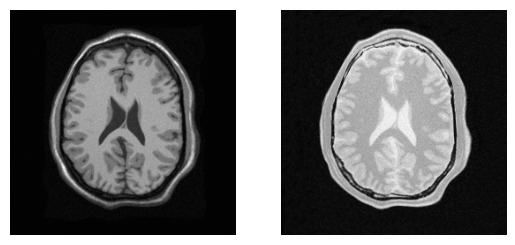

In [12]:
show_images(fixed_image, result_image)

In [13]:
from pathlib import Path
import pandas as pd

def extract_iteration_info_from_files(dirpath):
    """ Extract iteration info from 'IterationInfo' files """
    dirpath = Path(dirpath)
    read_iteration_info = lambda filepath: pd.read_csv(filepath, sep="\t", index_col=False, header=0)
    iteration_info_dfs = [read_iteration_info(filepath) for filepath in dirpath.iterdir() if 'IterationInfo' in str(filepath)]
    iteration_info = pd.concat(iteration_info_dfs, ignore_index=True)
    return iteration_info

# Extract iteration information into a pandas dataframe
iteration_info = extract_iteration_info_from_files('./output/')
iteration_info.head()

,1:ItNr,2:Metric,2:Metric0,2:Metric1,3a:Time,3b:StepSize,4:||Gradient0||,4:||Gradient1||,4:||Gradient||,Time0[ms],Time1[ms],Time[ms]
0,0,-1.085680,-1.085680,0.000000,0.0,773.566805,0.007683,0.000000,0.007683,3.2,1.5,42.9
1,1,-1.135823,-1.135824,0.000001,0.0,773.566805,0.007861,0.000001,0.007860,2.1,1.1,3.7
2,2,-1.145906,-1.145911,0.000005,0.0,773.566805,0.005369,0.000001,0.005368,2.0,3.3,6.2
3,3,-1.182609,-1.182617,0.000008,0.0,773.566805,0.006595,0.000002,0.006594,2.9,1.4,4.8
4,4,-1.163311,-1.163323,0.000012,0.0,773.566805,0.005678,0.000002,0.005677,2.0,1.9,4.4


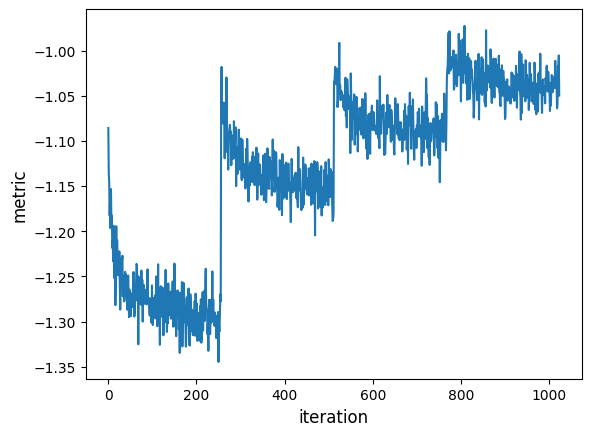

In [14]:
plt.plot(iteration_info['2:Metric'])
plt.xlabel('iteration', fontsize=12)
plt.ylabel('metric', fontsize=12)
plt.show()

In [15]:
print(result_transform_parameters)

ParameterObject (000001B72F21A9F0)
  RTTI typeinfo:   class elastix::ParameterObject
  Reference Count: 1
  Modified Time: 49711
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (BSplineTransformSplineOrder 3)
  (CompressResultImage "false")
  (DefaultPixelValue 0)
  (Direction 1 0 0 1)
  (FinalBSplineInterpolationOrder 3)
  (FixedImageDimension 2)
  (FixedInternalImagePixelType "float")
  (GridDirection 1 0 0 1)
  (GridIndex 0 0)
  (GridOrigin -12.5 -12.5)
  (GridSize 29 29)
  (GridSpacing 10 10)
  (HowToCombineTransforms "Compose")
  (Index 0 0)
  (InitialTransformParametersFileName "NoInitialTransform")
  (MovingImageDimension 2)
  (MovingInternalImagePixelType "float")
  (NumberOfParameters 1682)
  (Origin 0 0)
  (ResampleInterpolator "FinalBSplineInterpolator")
  (Resampler "DefaultResampler")
  (ResultImageFormat "nii")
  (ResultImagePixelType "float")
  (Size 256 256)
  (Spacing 1 1)
  (Transform "BSplineTransform")
  (TransformParameters 0.000759438 0.0056

### Calling transformix

In [16]:
# Load the moving mask and apply the previous registration result
moving_mask = itk.imread("./data/CT_2D_head_moving_mask.mha", itk.F)
result_mask_transformix = itk.transformix_filter(
    moving_mask,
    result_transform_parameters)

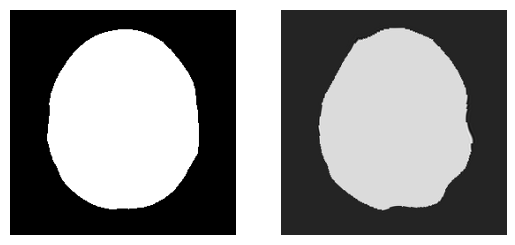

Unique pixel values: 
[-0.19669576 -0.19625664 -0.19425136 ...  1.195461    1.1984901
  1.1984911 ]


In [17]:
# We notice that the transformed mask appears more "grayish" (due to interpolation)
show_images(moving_mask, result_mask_transformix)

print("Unique pixel values: ")
print(np.unique(result_mask_transformix))

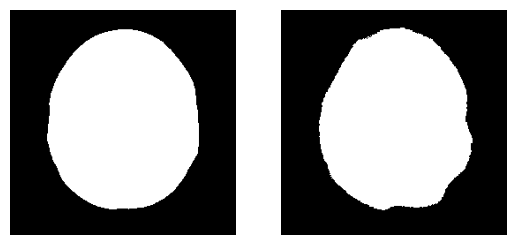

Unique pixel values: 
[0. 1.]


In [18]:
# Override the interpolation order to achieve NearestNeighbor behavior (no interpolation)
result_transform_parameters.SetParameter(0, "FinalBSplineInterpolationOrder", "0")
result_mask_transformix_nearest = itk.transformix_filter(
    moving_mask,
    result_transform_parameters,
    log_to_console=True)

show_images(moving_mask, result_mask_transformix_nearest)

print("Unique pixel values: ")
print(np.unique(result_mask_transformix_nearest))

# MONAI Integration (teaser)
![alternatvie text](https://monai.io/assets/img/MONAI-logo_color_full.png)

MONAI: Open source deep learning library build on top of pytorch specializing in medical imaging.

### Part I: Elastix as preprocessing step of a MONAI pipeline

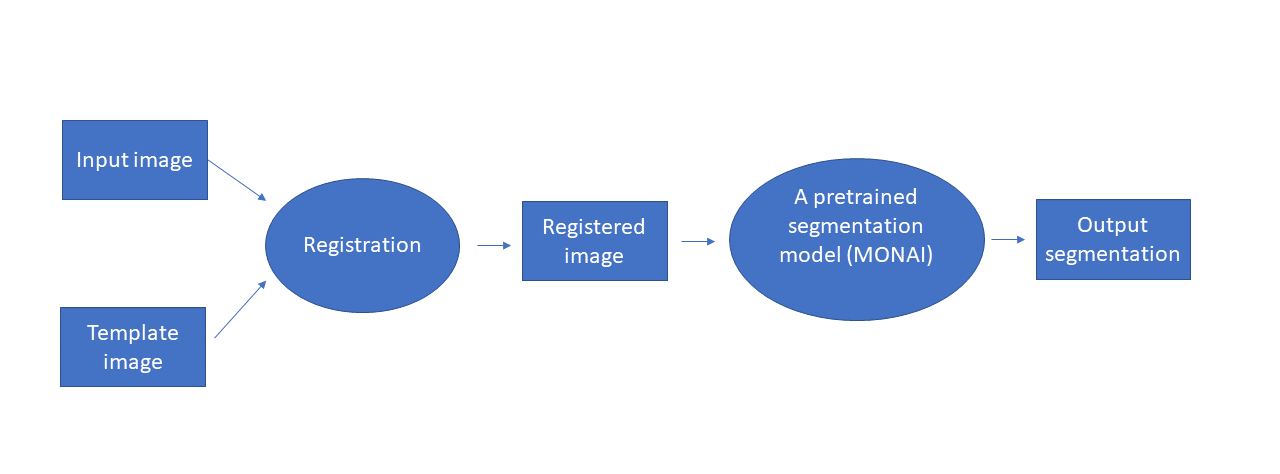

For example, the MONAI Label [whole-brain-segmentation-model](https://github.com/Project-MONAI/model-zoo/tree/dev/models/wholeBrainSeg_Large_UNEST_segmentation) requires pre-registering to the MNI305 space.


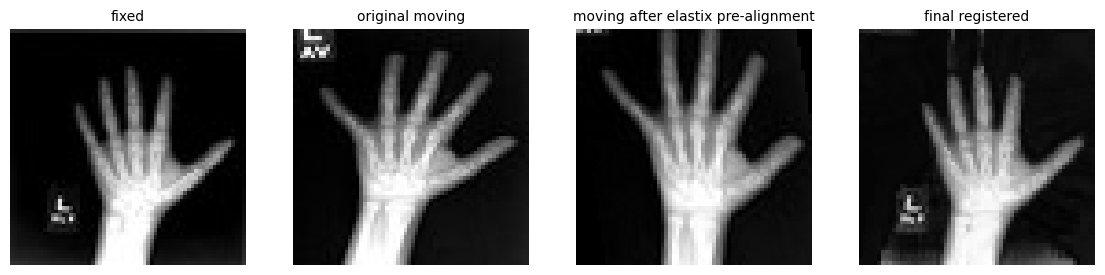

---
monai_preprocessing = Compose([ReadWithITK(), 
                              RegisterWithElastix(), 
                              ConvertToArray()])

dataset = CacheDataset(data=training_list, transform=monai_preprocessing)

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)

---
See detailed [jupyter notebook example](https://github.com/InsightSoftwareConsortium/ITKElastix/blob/main/examples/ITK_Example17_MONAIWithPreregistration.ipynb) on hand x-rays dataset. 

### Part II: Use a MONAI transform as initial transform for Elastix

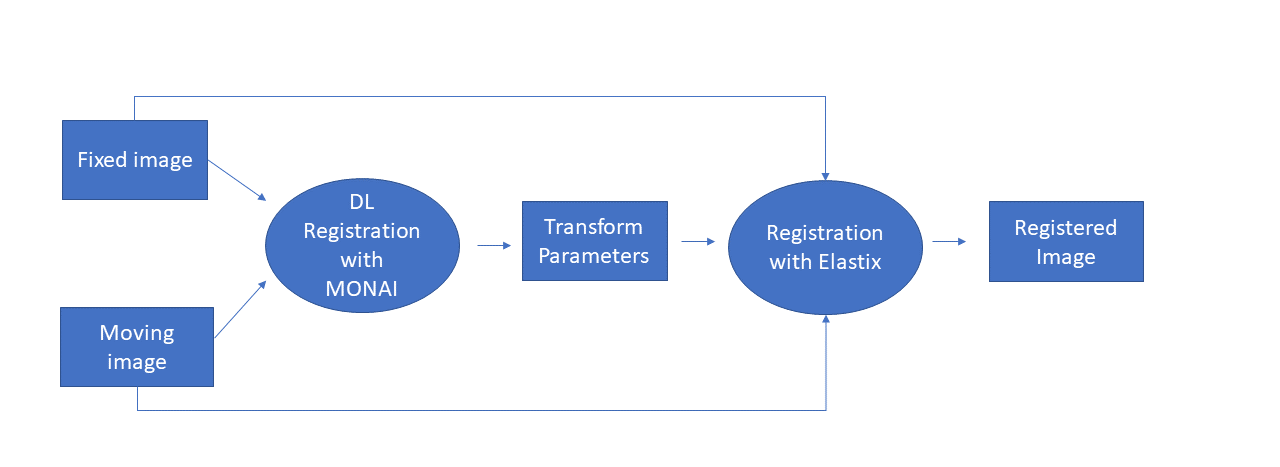

#### For this purpose we developed [itk_torch_bridge](https://docs.monai.io/en/latest/data.html#module-monai.data.itk_torch_bridge)

Bridges:
1. ITK Image <-> MONAI MetaTensor
2. ITK Transform <-> MONAI Transform

In [19]:
from monai.data import itk_torch_bridge

#### 1. itk.Image <-> monai.data.MetaTensor

In [20]:
# Read an example image
image = itk.imread("./data/CT_2D_head_fixed.mha", itk.F)

# Set metadata (only for demonstration purposes)
image.SetSpacing([1.5, 2.7])
image.SetOrigin([-32.5, 60.1])
print(image)

Image (000001B70E9A5510)
  RTTI typeinfo:   class itk::Image<float,2>
  Reference Count: 1
  Modified Time: 1691
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1499
  UpdateMTime: 1687
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [256, 256]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [256, 256]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [256, 256]
  Spacing: [1.5, 2.7]
  Origin: [-32.5, 60.1]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1.5 0
0 2.7

  PointToIndexMatrix: 
0.666667 0
0 0.37037

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (000001B73236F260)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,float>
      Reference Count: 1
      Modified Time: 1684
      Debug: Off
      Object Name: 
     

In [21]:
image_metatensor = itk_torch_bridge.itk_image_to_metatensor(image)

print(image_metatensor.meta)

{'spacing': array([1.5, 2.7]), original_affine: array([[  1.5,   0. , -32.5],
       [  0. ,   2.7,  60.1],
       [  0. ,   0. ,   1. ]]), space: LPS, affine: tensor([[  1.5000,   0.0000, -32.5000],
        [  0.0000,   2.7000,  60.1000],
        [  0.0000,   0.0000,   1.0000]], dtype=torch.float64), spatial_shape: array([256, 256]), original_channel_dim: nan}


In [22]:
image_converted_back = itk_torch_bridge.metatensor_to_itk_image(image_metatensor)
print(image_converted_back)

Image (000001B70E9A58D0)
  RTTI typeinfo:   class itk::Image<float,2>
  Reference Count: 1
  Modified Time: 1708
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [256, 256]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [256, 256]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [256, 256]
  Spacing: [1.5, 2.7]
  Origin: [-32.5, 60.1]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1.5 0
0 2.7

  PointToIndexMatrix: 
0.666667 0
0 0.37037

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (000001B73236FAE0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,float>
      Reference Count: 1
      Modified Time: 1705
      Debug: Off
      Object Name: 
      Obser

#### 2. Transform: World coordinate space (ITK) <-> Pixel coordinate space (MONAI)
* Spacing
* Direction matrix
* Origin
* Center of rotation

In [23]:
import torch

# Create a random affine matrix (that could be the output of an affine deep learning registration model)
affine_matrix = torch.tensor([[ 1.02048923, -0.05558303, -0.00331531], 
                              [ 0.02022994,  0.93339695, -0.23470405], 
                              [ 0.00000000,  0.00000000,  1.00000000]], dtype=torch.double) 

# Convert the affine_matrix to a 2x2 matrix and 2-element (for 2D) translation vector suitable for use in ITK 
matrix, translation = itk_torch_bridge.monai_to_itk_affine(image=image, affine_matrix=affine_matrix)

print(matrix)
print(translation)

[[ 1.02048923 -0.03087946]
 [ 0.03641389  0.93339695]]
[-0.004972965, -0.633700935]


**... these ITK parameters can be used as initial transform for Elastix. The same is possible for Dense Displacement Field.**

Upcoming related notebooks (currently are PRs! - waiting for "SetInitialTransform(itk_transform)" to be implemented for Elastix)
1. Jupyter example: [MONAI Affine --> Elastix non-linear transform](https://github.com/InsightSoftwareConsortium/ITKElastix/pull/194)
2. Jupyter example: [MONAI non-linear --> Elastix non-linear transform](https://github.com/InsightSoftwareConsortium/ITKElastix/pull/195)

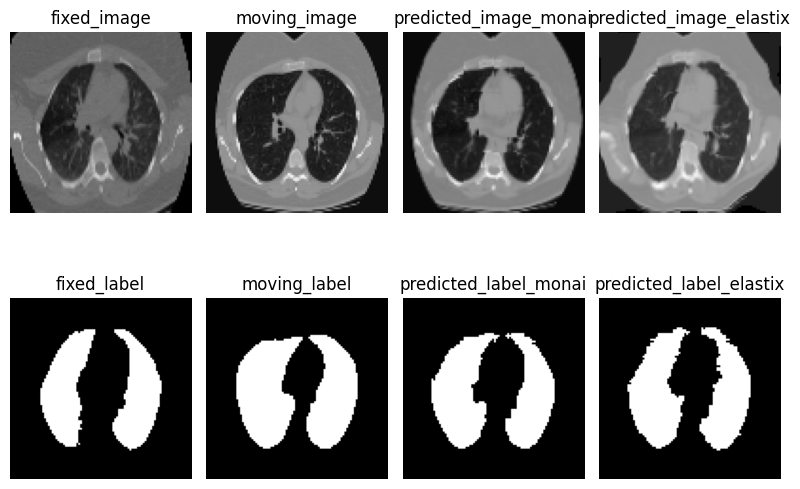